# Portfolio Optimization

#### Importing Libraries

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import minimize

## 1. Data Exploration

####  1.1. Importing Closing prices for APPLE, CISCO, IBM and AMAZON for period from 2012-01-03 till 2016-12-30

In [191]:
apple = pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
cisco = pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)
ibm = pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
amazon = pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)

# Concatinating stock prices
stocks = pd.concat([apple, cisco, ibm, amazon], axis = 1)
stocks.columns = ['aapl','cisco','ibm','amzn']
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56


#### 1.3. Plotting daily stock prices

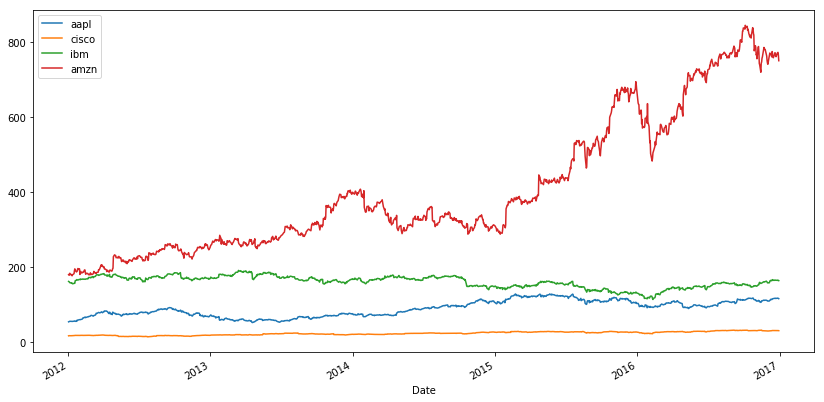

In [144]:
stocks.plot(figsize = (14, 7))

#### 1.4. Log daily returns

In [145]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


#### 1.5. Histograms of log returns

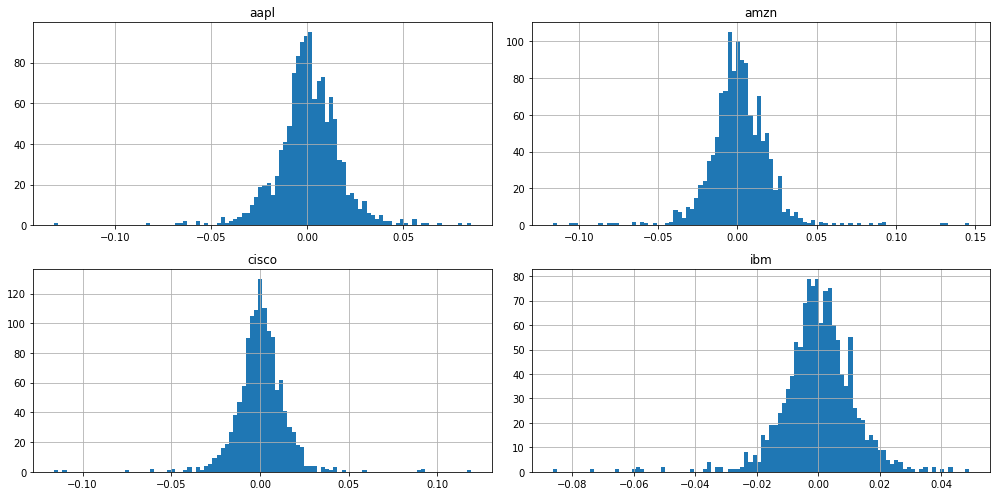

In [146]:
log_ret.hist(bins = 100, figsize=(14,7))
plt.tight_layout()

#### 1.6. Mean yearly return, volatility, skewness, kurtosis, sortino ratio

MEAN YEARLY RETURN:
   * Total return earned overa period of one calendar year
   
VOLATILITY:
   * Returns spread around the mean is measured by the variance σ2 and is a common measure of volatility
   * Variance of an individual asset varies: some have more or less spread around the mean

SKEWNESS:
   * Skewness < −1 or Skewness > 1 ⇒ Highly skewed distribution
   * −1 < Skewness < −0.5 or 0.5 < Skewness < 1 ⇒ Moderately skewed distribution 
   * −0.5 < Skewness < 0.5 ⇒ Approximately symmetric distribution
  
KURTOSIS:
   * A normal distribution has kurtosis of exactly 3 and is called (mesokurtic)
   * A distribution with kurtosis <3 is called platykurtic. Tails are shorter and thinner, and central peak is   lower     and broader.
   * A distribution with kurtosis >3 is called leptokurtic: Tails are longer and fatter, and central peak is higher     and sharper (fat tailed)
   
SORTINO RATIO:
   * Risk measure on potential losses i.e. downside risk

In [190]:
working_days_per_year = 252

for stock in log_ret.columns:
    stock_returns = log_ret[stock]
    
    ### Sortino ratio ###
    # Defining risk free rate and target return of 0
    rfr = 0 
    target_return = 0
    
    # Selecting the negative returns only
    negative_returns = log_ret[stock].loc[log_ret[stock] < target_return]
    
    # Calculating std dev of downside returns
    down_stdev = negative_returns.std()
    
    
    print("***",stock,'***')
    
    print("mean : ", stock_returns.mean() * working_days_per_year) 
    print("vol : ", stock_returns.std()) 
    print("skew : ", stock_returns.skew()) 
    print("kurt : ", stock_returns.kurtosis())
    
    # Calculating the sortino ratio
    sortino_ratio = ((stock_returns.mean() * working_days_per_year) - rfr)/down_stdev 
    print(f"sortino : ", sortino_ratio)
    print()
    print()
    
print("Correlation:")
print(log_ret.corr())
print()
print("Covariance:")
print(log_ret.cov() * working_days_per_year)

*** aapl ***
mean :  0.15480340656629674
vol :  0.0164661598216673
skew :  -0.3896913106744814
kurt :  5.976354963579263
sortino :  12.754788749527094


*** cisco ***
mean :  0.1252913670184182
vol :  0.014279139600436811
skew :  0.00026909311808103104
kurt :  14.697220975177263
sortino :  11.694388614544534


*** ibm ***
mean :  0.002787522741920067
vol :  0.011819293456169262
skew :  -0.978310643931583
kurt :  6.717728128820205
sortino :  0.2955732699258704


*** amzn ***
mean :  0.2871529913203582
vol :  0.019361811776611188
skew :  0.46951532741748564
kurt :  9.802629456520927
sortino :  21.247090658845156


Correlation:
           aapl     cisco       ibm      amzn
aapl   1.000000  0.301328  0.294922  0.236312
cisco  0.301328  1.000000  0.423915  0.286434
ibm    0.294922  0.423915  1.000000  0.259051
amzn   0.236312  0.286434  0.259051  1.000000

Covariance:
           aapl     cisco       ibm      amzn
aapl   0.068326  0.017854  0.014464  0.018986
cisco  0.017854  0.051381  0.018

## 2. Equal Weights Portfolio

In [179]:
weights = np.array([0.25, 0.25, 0.25, 0.25])
eq_ret = np.sum(log_ret.mean() * weights) * working_days_per_year
eq_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * working_days_per_year, weights))) 
eq_sr = eq_ret/eq_vol 

print("***** Eqaul Weights Portfolio Results *****")
print()
print(f'Weights:')
for i in range(len(stocks.columns)):
    print(stocks.columns[i], ':', weights[i])
print()
print(f"Expected Return: {eq_ret}")
print(f"Expected Variance/Volatility: {eq_vol}")
print(f"Sharpe Ratio: {eq_sr}")

***** Eqaul Weights Portfolio Results *****

Weights:
aapl : 0.25
cisco : 0.25
ibm : 0.25
amzn : 0.25

Expected Return: 0.1425088219117481
Expected Variance/Volatility: 0.16915890459555571
Sharpe Ratio: 0.8424553366107114


## 3. Monte Carlo Simulation for Optimal portfolio weights

Randomly trying to find the optimal portfolio balance using Monte Carlo simulation

***** Monte Carlo Optimization Results *****

Best weights:
aapl : 0.24539042426017593
cisco : 0.22890882997558837
ibm : 0.00013525332936461945
amzn : 0.525565492434871

Best Sharpe Ratio: 1.030184990440677
Best Return: 0.21758565415361372
Minimum volatility for best return: 0.21121027405042875




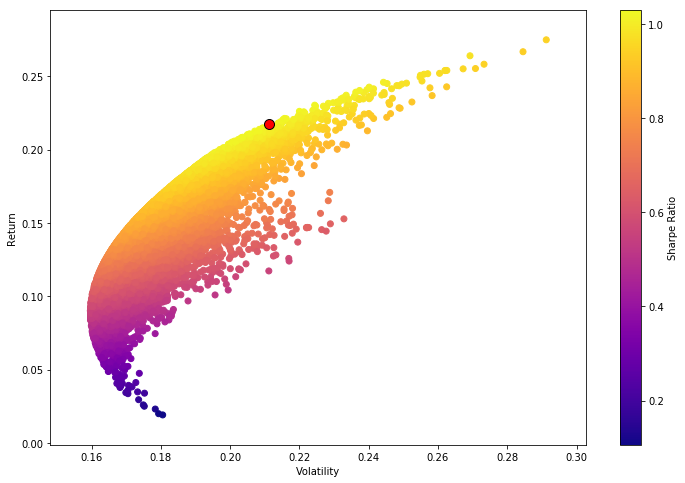

In [233]:
def monte_carlo_simulation(stocks):
    num_ports = 15000

    all_weights = np.zeros((num_ports,len(stocks.columns)))
    ret_arr = np.zeros(num_ports)
    vol_arr = np.zeros(num_ports)
    sharpe_arr = np.zeros(num_ports)

    for ind in range(num_ports):

        # Createing Random Weights
        weights = np.array(np.random.random(4))

        # Rebalancing Weights
        weights = weights / np.sum(weights)

        # Saving Weights
        all_weights[ind,:] = weights

        # Expected Return
        ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

        # Expected Variance
        vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

        # Sharpe Ratio
        sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]
        
    return all_weights, ret_arr, vol_arr, sharpe_arr

all_weights, ret_arr, vol_arr, sharpe_arr = monte_carlo_simulation(stocks)

# Assigning the results
best_monte_carlo_sr = sharpe_arr[sharpe_arr.argmax()]
best_monte_carlo_return = ret_arr[sharpe_arr.argmax()]
best_monte_carlo_vol = vol_arr[sharpe_arr.argmax()]

print("***** Monte Carlo Optimization Results *****")
print()
print(f'Best weights:')
for i in range(len(stocks.columns)):
    print(stocks.columns[i], ':', all_weights[sharpe_arr.argmax()][i])
print()
print(f'Best Sharpe Ratio: {best_monte_carlo_sr}')
print(f'Best Return: {best_monte_carlo_return}')
print(f'Minimum volatility for best return: {best_monte_carlo_vol}')
print()
print()

# Plotting the data
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Adding red dot for max Sharpe Ratio
plt.scatter(vol_arr[sharpe_arr.argmax()],ret_arr[sharpe_arr.argmax()],c='red',s=100,edgecolors='black')

## 4. Markowitz Portfolio Optimization

Finding the best possible good allocation weights for using Markowitz Portfolio Optimization

##### The optimization problem: finding optimal weights

minimise:
            
        𝑤𝑇∑𝑤 - Minimizing the portfolio variance

subjec to: 
        
        𝑤𝑇 μ >= μ* - The expected mean return is at least some target return

        ∑𝑖𝑤𝑖=1      - The weights sum up to 100%
        i

        𝑤𝑖>=0      - At least some weights are positive

***** Markowitz Optimization Results *****

Best weights:
aapl : 0.2662897743907441
cisco : 0.20418983101829322
ibm : 7.527073582480615e-17
amzn : 0.5295203945909627

Best Sharpe Ratio: 1.0307168703342362
Best Return: 0.2188591525409306
Minimum volatility for best return: 0.21233682967657255




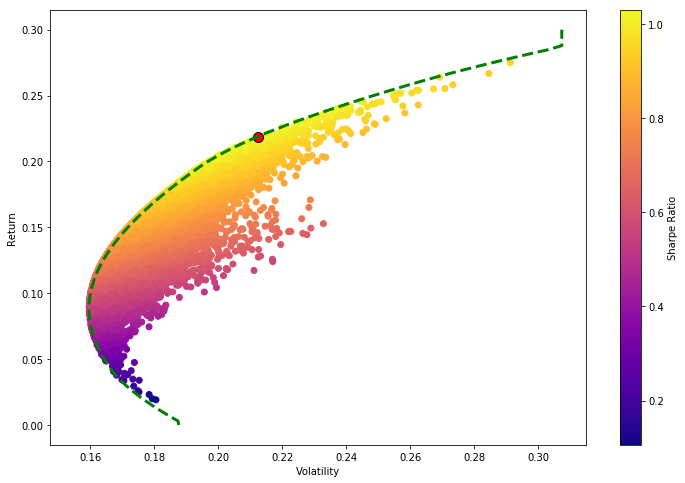

In [234]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or Expected Return,# Expected Variance/Volatility, Sharpe Ratio
    """
    weights = np.array(weights)
    
    # Expected Return
    ret = np.sum(log_ret.mean() * weights) * 252 
    
    # Expected Variance
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights))) 
    
    # Sharpe Ratio
    sr = ret/vol 
    
    return np.array([ret,vol,sr])


### --- Objective function --- ###
from scipy.optimize import minimize

"""
Optimization works as a minimization function, since we actually want to maximize the Sharpe Ratio, 
we will need to turn it negative so we can minimize the negative sharpe (same as maximizing the postive sharpe)
"""

def neg_sharpe(weights):
    """
    Parameters
    ----------
    weights : List
        List containing weights for each stock
        
    Returns
    -------
    sharpe_ratio : float_object
        Returns the sharpe ratio of given 
    
    """
    # Using the function 'get_ret_vol_sr'
    sharpe_ratio = get_ret_vol_sr(weights)[2] * -1
    return  sharpe_ratio

### ---  Contraints --- ###
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1


# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

# Initial Guess (equal distribution)
init_guess = [0.25,0.25,0.25,0.25]

# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

# Getting best weights
markowitz_weights = opt_results.x

# getting best return, volatility, sharpe ratio
best_values = get_ret_vol_sr(opt_results.x)

# Assigning results
best_markowitz_sr = best_values[2]
best_markowitz_return = best_values[0]
best_markowitz_vol = best_values[1]

print("***** Markowitz Optimization Results *****")
print()
print(f'Best weights:')
for i in range(len(stocks.columns)):
    print(stocks.columns[i], ':', markowitz_weights[i])
print()
print(f'Best Sharpe Ratio: {best_markowitz_sr}')
print(f'Best Return: {best_markowitz_return}')
print(f'Minimum volatility for best return: {best_markowitz_vol}')
print()
print()

# Plotting the data and adding efficient frontier
"""
The efficient frontier is the set of optimal portfolios that offers the highest expected return 
for a defined level of risk or the lowest risk for a given level of expected return. 

"""

# Returns go from 0 to somewhere along 0.3
# Creating a linspace number of points to calculate x on
frontier_y = np.linspace(0,0.3,100) 

def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 


frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])


plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)

# Adding red dot for max Sharpe Ratio
plt.scatter(best_values[1],best_values[0],c='red',s=100,edgecolors='black')

## 5. Portfolio Optimization, based on Exponential Return and Exponential Cov matrix

#### Problems with expected risk and return based on historic data:
    * Mean historic returns, or the historic portfolio variance are not perfect estimates of mu and Sigma
    * Weights from portfolio optimization therefore not guaranteed to work well on future data
    
#### Exponentially weighted returns:
    * Exponentially weighted risk and return assigns more importance to the most recent data
    
#### Exponentially weighted covariance
    * The exponential covariance matrix: gives more weight to recent data

In [212]:
"""
Optimazing and calculating using 'pypfopt' library.

"""
from pypfopt.efficient_frontier import EfficientFrontier 
from pypfopt import risk_models
from pypfopt import expected_returns


working_days_per_year = 252

# Setting look back window over which the return is calculated
span = 180

"""
Setting span parameter:

* If the data is very volatile and changes rapidly, 
    working with a short span might gives better predictive power of the expected return, 
    with a faster moving investment strategy.
    
* If the data is slow moving as is the case with this data, 
    the short span does not in better predicting expected risk and returns.
"""

# Defining exponentially return using stock prices
exponen_return = expected_returns.ema_historical_return(stocks, frequency = working_days_per_year, span = span)

# Defining exponentially cov matrix
exponen_cov = risk_models.exp_cov(stocks, span=span, frequency=working_days_per_year)

# Calculating the efficient frontier
ef_frontier_exponen = EfficientFrontier(exponen_return, exponen_cov)

# Calculating weights for the maximum sharpe ratio optimization
weights_max_sharpe_exponen = ef_frontier_exponen.max_sharpe()

# Geting interpretable weights
cleaned_weights_exponen = ef_frontier_exponen.clean_weights()


# Portfolio performance 
best_exponen_return, best_exponen_vol, best_exponen_sr = ef_frontier_exponen.portfolio_performance()

print("***** Exponential Optimization Results *****")
print()
print(f'Best weights:')
for stock,weight in weights_max_sharpe_exponen.items():
    print(stock,' :',weight)
print()
print(f'Best Sharpe Ratio: {best_exponen_sr}')
print(f'Best Return: {best_exponen_return}')
print(f'Minimum volatility for best return: {best_exponen_vol}')
print()
print()

***** Exponential Optimization Results *****

Best weights:
aapl  : 0.358735019667263
cisco  : 0.0
ibm  : 0.6412649803327368
amzn  : 0.0

Best Sharpe Ratio: 1.4815205370064177
Best Return: 0.23986447543252398
Minimum volatility for best return: 0.1484046086035266




## 6. Comparing the results of different approaches

In [235]:

# Assigning all the values into lists
best_sharpe_ratios = [eq_sr, best_monte_carlo_sr, best_markowitz_sr, best_exponen_sr]
best_returns = [eq_ret, best_monte_carlo_return, best_markowitz_return, best_exponen_return]
best_volatilities = [eq_vol, best_monte_carlo_vol, best_markowitz_vol, best_exponen_vol]

# Creating dataframe
all_data = {'Best_Sharpe_Ratio': best_sharpe_ratios, 'Best_Return': best_returns, 'Best_Volatility': best_volatilities}
comparision_df = pd.DataFrame(data = all_data, index = ['Equal_Weights','Monte_Carlo','Markowitz','Exponential'])

comparision_df

,Best_Sharpe_Ratio,Best_Return,Best_Volatility
Equal_Weights,0.842455,0.142509,0.169159
Monte_Carlo,1.030185,0.217586,0.211210
Markowitz,1.030717,0.218859,0.212337
Exponential,1.481521,0.239864,0.148405
